# Лабораторная работа 9.2. Метод Дурбина-Левинсона
### Тылецкого Павла

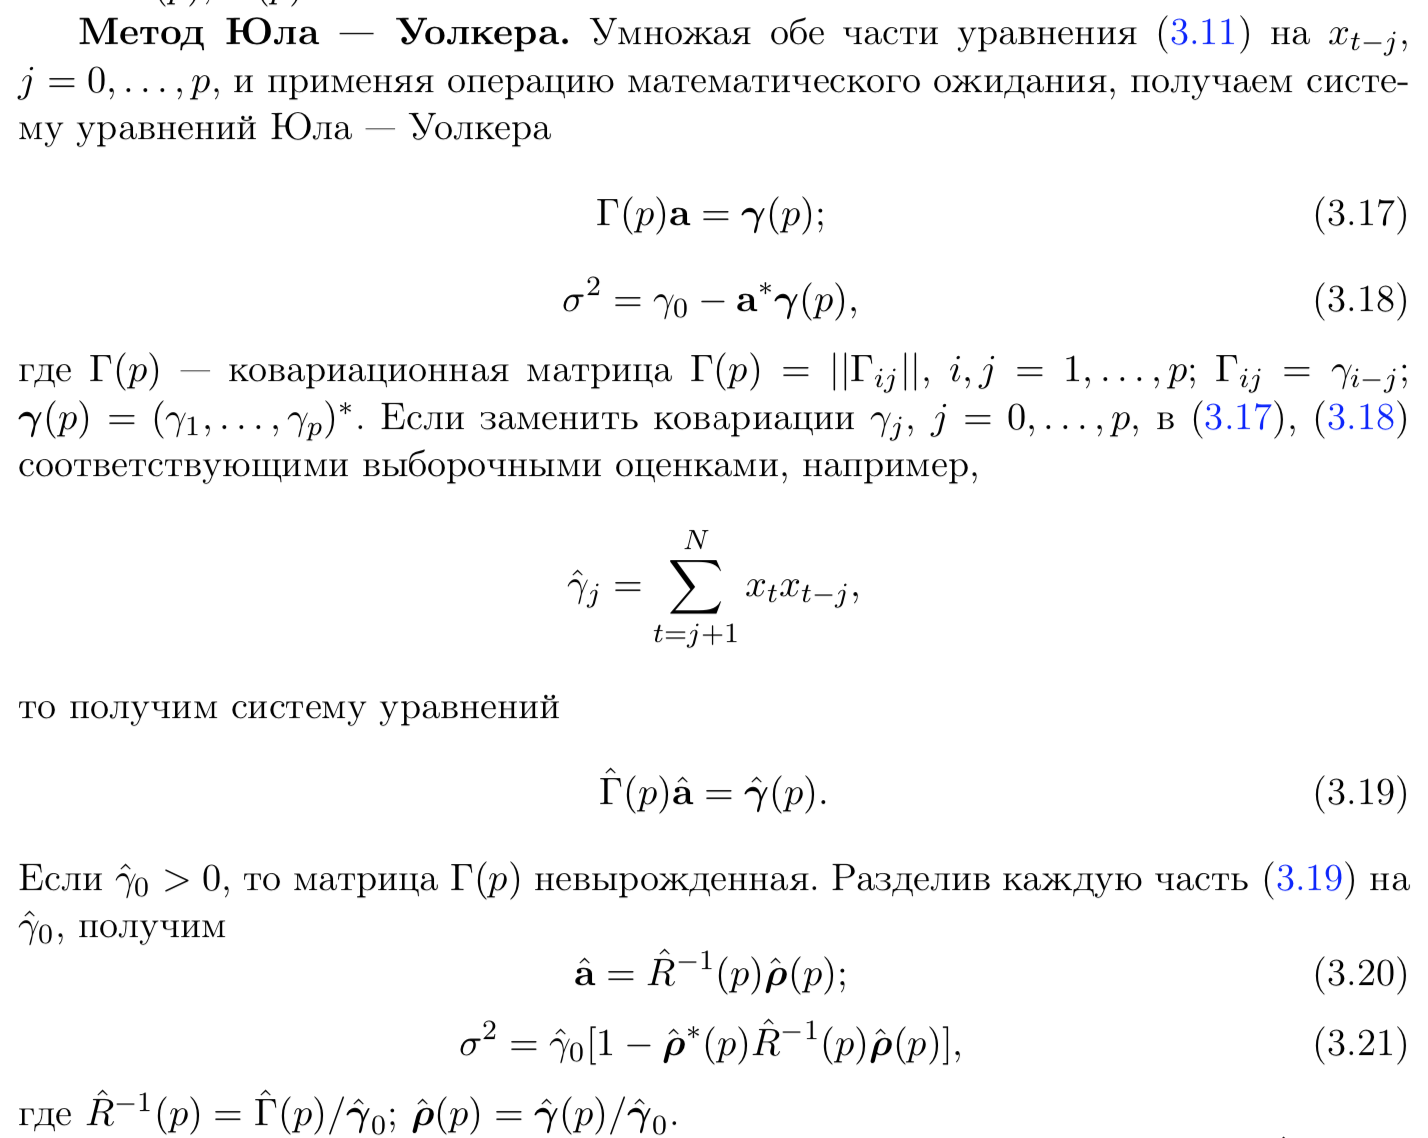
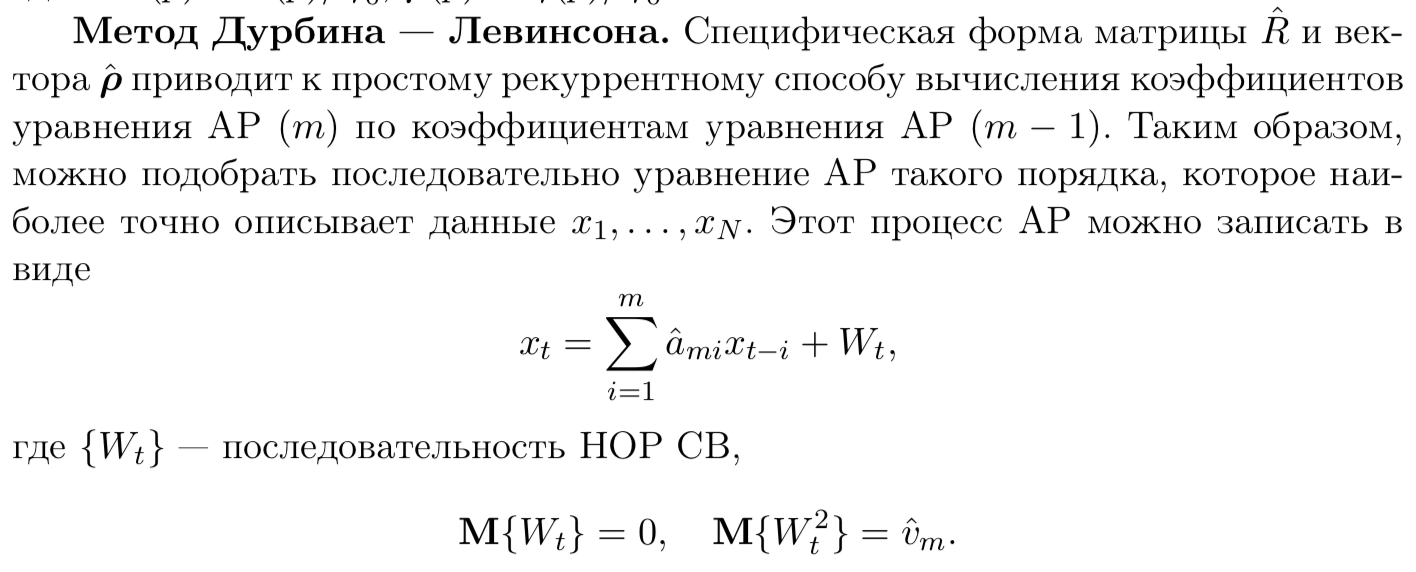
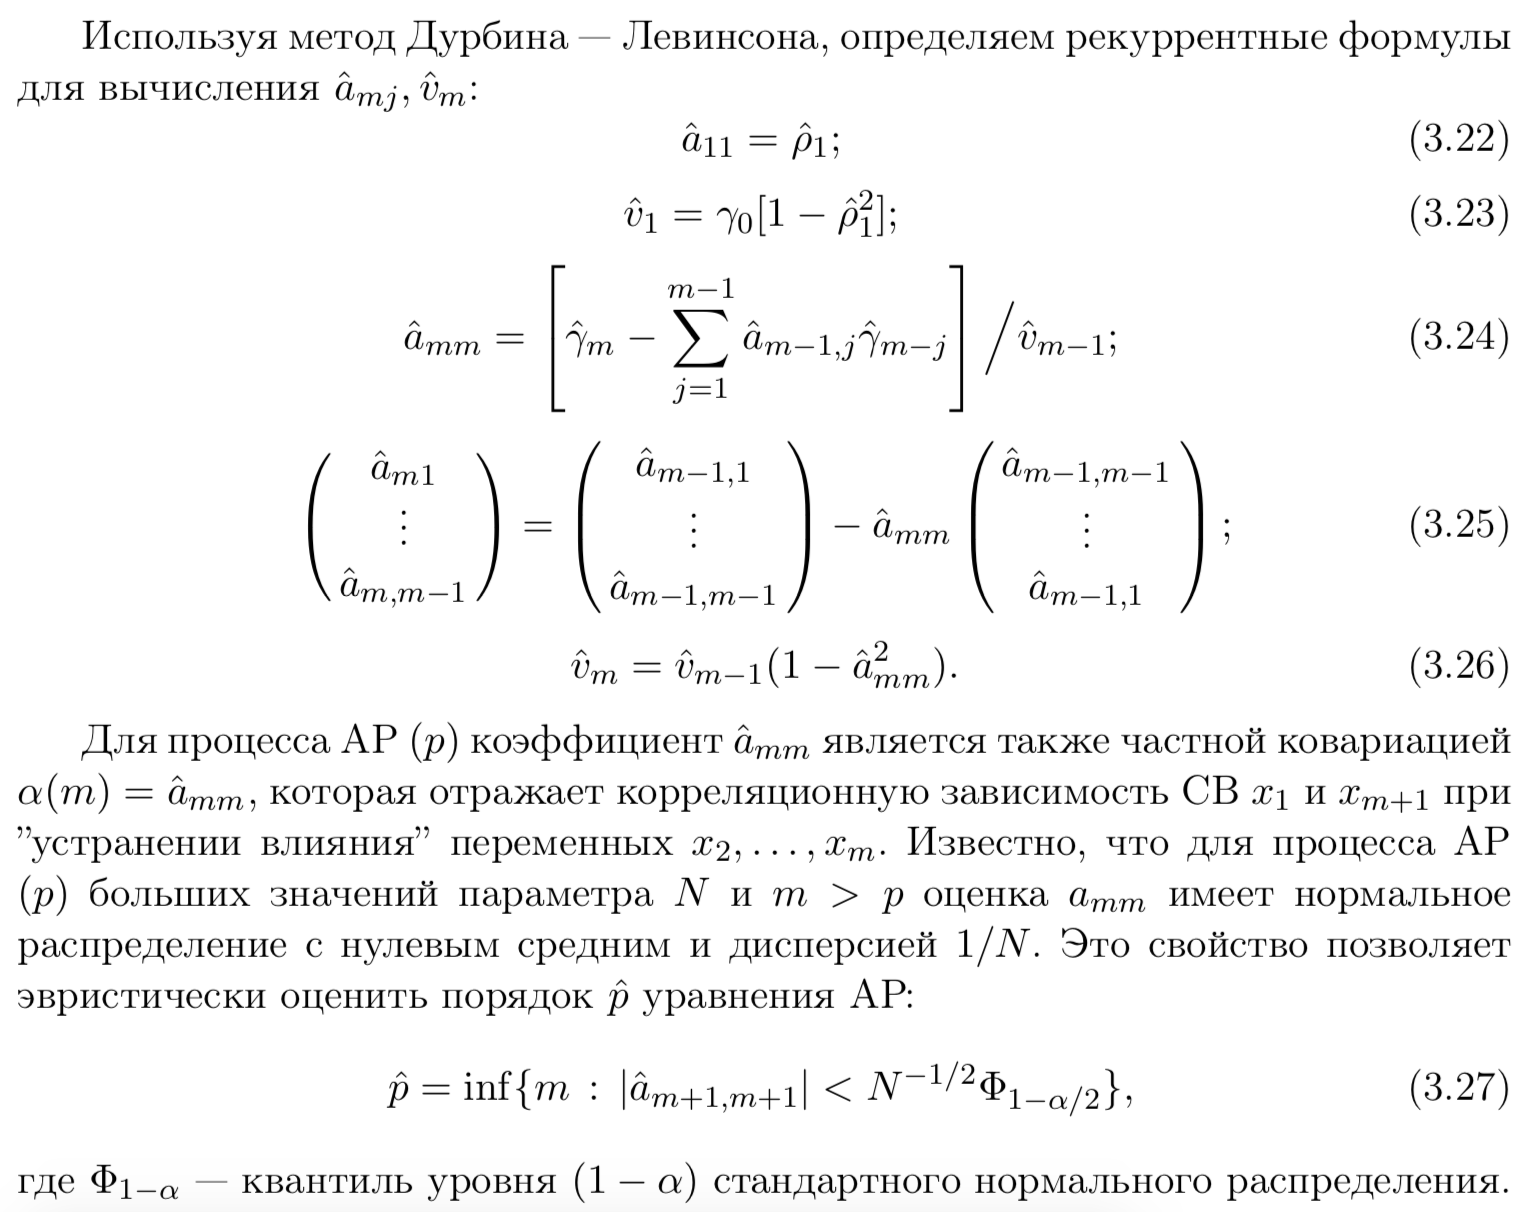

In [22]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

N = 5000

def generate_W():
    return np.random.normal(0, 1)


def generate_a(alpha, p):
    return (1 - (1 - alpha) ** p) / p


def generate_xa(p):
    x = []
    a = []
    for i in range(0, p):
        a.append(generate_a(np.random.uniform(0, 1), p))
        x.append(a[-1] * 0.03 + generate_W())

    for i in range(p + 1, N + 1):
        x_ = np.array(x[-p:])
        a_ = np.array(a)
        x.append(x_.dot(a_) + generate_W())

    return x, a

def yule_walker(p, x, a_origin):
    Γ = np.zeros((p + 1, p + 1))

    def γ(j):
        return sum([x[t]*x[t - j] for t in range(j + 1, N)])

    for i in range(1, p + 1):
        for j in range(i, p + 1):
            Γ[i, j] = γ(j - i)

    R = Γ / γ(0)
    ρ = np.array([γ(i) for i in range (1, p + 1)]) / γ(0)

    return Γ, ρ, R

def durbin_levinson(Γ, ρ, p):   
    M = p
    y0 = 1
    v = np.ones(M + 1)
    y = Γ.diagonal()
    a = np.zeros((M + 1, M + 1))
    a[1][1] = ρ[1]
    v[1] = y0*(1 - ρ[1]**2)
    for i in range(1, M + 1):
        s = 0
        for j in range(1, i):
            s += a[i - 1][j] * y[i - j - 1]
        a[i][i] = (y[i - 1] + s) / (v[i - 1])
        a[i][1:i - 1] = a[i - 1][1:i - 1] - a[i][i] * a[i - 1][i - 1:1:-1]
        v[i] = v[i - 1] * (1 - a[i][i] ** 2)
    return a

def predict_degree(x, a):
    arr = []
    for m in range(3, len(a) - 1):
        if np.abs(a[m + 1][m + 1]) < np.quantile(x, 1 + a[m][m] / 2) / np.sqrt(N):
            arr.append(m)
    return np.max(arr) + 1

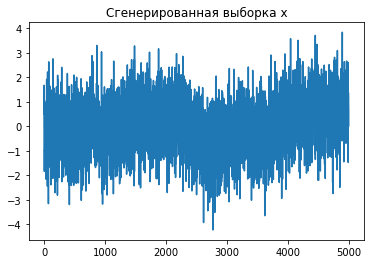

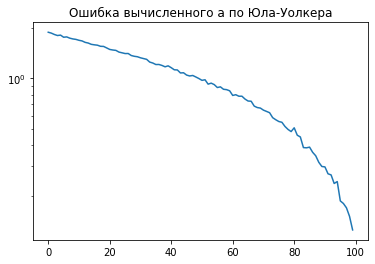

In [20]:
p = 100
x, a_origin = generate_xa(p)
plt.plot(x)
plt.title('Сгенерированная выборка х')
plt.show()

Γ, ρ, R = yule_walker(p, x, a_origin)
a_founded = R[1:, 1:].dot(ρ.T)
a_diff = np.absolute(a_founded - np.array(a_origin))
plt.plot(a_diff)
plt.title('Ошибка вычисленного а по Юла-Уолкера')
plt.yscale('log')
plt.show()

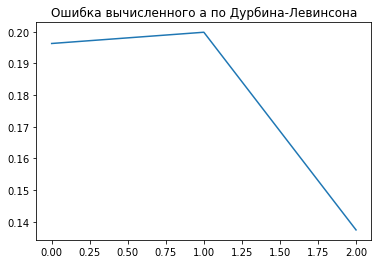

True (predicted degree: 5, actual: 5)


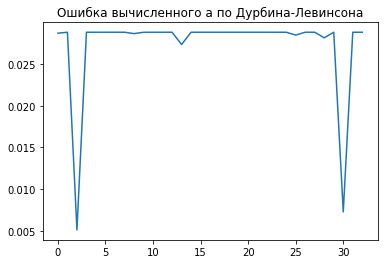

True (predicted degree: 35, actual: 35)


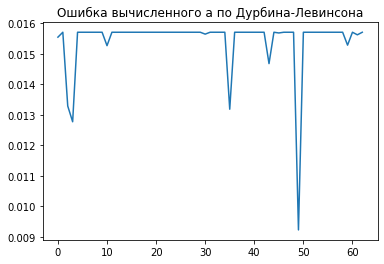

True (predicted degree: 65, actual: 65)


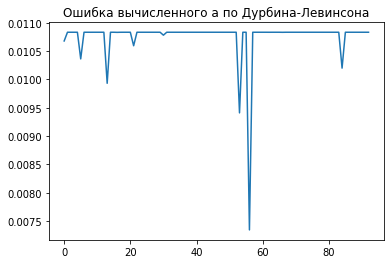

True (predicted degree: 95, actual: 95)


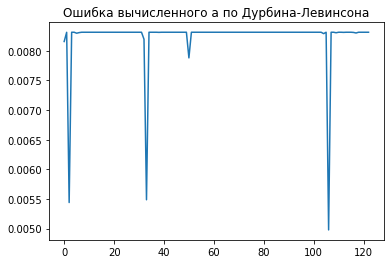

True (predicted degree: 125, actual: 125)


In [25]:
for p in range(5, 150, 30):
    x, a_origin = generate_xa(p)
    Γ, ρ, R = yule_walker(p, x, a_origin)
    a = durbin_levinson(Γ, ρ, p)
    
    a_diff = np.absolute(a.diagonal()[3:] - np.array(a_origin[2:]))
    plt.plot(a_diff)
    plt.title('Ошибка вычисленного а по Дурбина-Левинсона')
    plt.show()
    
    pp = predict_degree(x, a)
    print(f'{pp == p} (predicted degree: {pp}, actual: {p})')

Как видно, для всех проверяемых значений алгоритм предсказания порядка выдал верные ответы. Порядок ошибок - 10^-2